# Portfolio 3 - Clustering Visualisation

K-means clustering is one of the simplest and popular unsupervised learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes. This notebook illustrates the process of K-means clustering by generating some random clusters of data and then showing the iterations of the algorithm as random cluster means are updated. 

We first generate random data around 4 centers.

In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 9,8
import warnings; warnings.simplefilter('ignore')

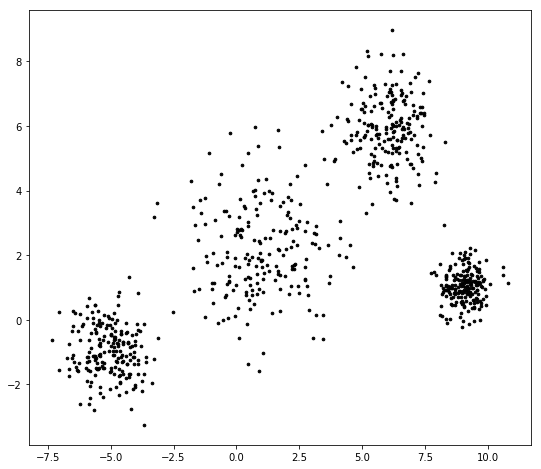

In [2]:
center_1 = np.array([1,2])
center_2 = np.array([6,6])
center_3 = np.array([9,1])
center_4 = np.array([-5,-1])

# Generate random data and center it to the four centers each with a different variance
np.random.seed(5)
data_1 = np.random.randn(200,2) * 1.5 + center_1
data_2 = np.random.randn(200,2) * 1 + center_2
data_3 = np.random.randn(200,2) * 0.5 + center_3
data_4 = np.random.randn(200,2) * 0.8 + center_4

data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)
plt.rcParams['figure.figsize'] = 9,8
plt.scatter(data[:,0], data[:,1], s=7, c='k')
plt.show()


## 1. Generate random cluster centres

You need to generate four random centres.

This part of portfolio should contain at least:  
- The number of clusters `k` is set to 4;
- Generate random centres via `centres = np.random.randn(k,c)*std + mean` where `std` and `mean` are the standard deviation and mean of the data. `c` represents the number of features in the data. Set the random seed to 6.
- Color the generated centers with `green`, `blue`, `yellow`, and `cyan`. Set the edgecolors to `red`.

In [3]:
global data,centres
def initialize():
    np.random.seed(6)
    data_1 = np.random.randn(200,2) * 1.5 + center_1
    data_2 = np.random.randn(200,2) * 1 + center_2
    data_3 = np.random.randn(200,2) * 0.5 + center_3
    data_4 = np.random.randn(200,2) * 0.8 + center_4
    data = np.concatenate((data_1, data_2, data_3, data_4), axis = 0)
    centres = np.random.randn(4,2)* std + mean

In [4]:
mean = data.mean()
std = data.std()

In [5]:
# your code here
np.random.seed(6)

centres = np.random.randn(4,2)* std + mean

In [6]:
centres

array([[ 1.0430169 ,  5.53863665],
       [ 3.33061168, -1.4938254 ],
       [-8.35175241,  6.33448312],
       [ 7.25803215, -4.15028729]])

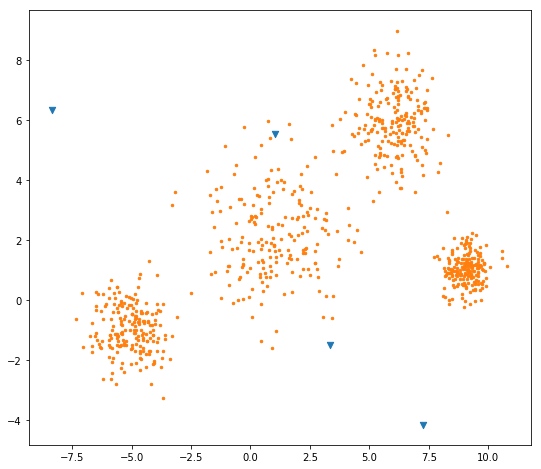

In [7]:
plt.scatter(centres[:,0],centres[:,1],marker="v",s=40)
plt.scatter(data[:,0],data[:,1],s=6)

In [8]:
def distance(a,b):
    return (np.linalg.norm(a-b,axis=1))

k = 4  
#So, we will have to have 4 cluster variables - Cluster 0,Cluster 1,Cluster 2,Cluster 3
#To store the cluster variable which will be assigned each data point
cluster_value = np.zeros(len(data))

In [9]:
def k_means():
    global centres,points,k,data
    for i in range(len(data)):
        distance_from_centres = distance(data[i],centres)
        cluster_label = np.argmin(distance_from_centres)
        cluster_value[i] = cluster_label
# Now, to find new centers, i.e. take mean of all points for each cluster label
    for i in range(k):
        points = [data[j] for j in range(len(data)) if cluster_value[j] == i]
        centres[i] = np.mean(points,axis=0)

### <font color = 'brown'>What k_means does?</font>
* <font color = 'brown'>Initialize the center of the clusters that we have chosen randomly</font>
* <font color = 'brown'>Attribute the closest cluster to each data point</font>
* <font color = 'brown'>Set the position of each cluster to the mean of all data points belonging to that cluster</font>
* <font color = 'brown'>Repeat steps 2-3 until convergence</font>

## 2. Visualise the clustering results in each iteration

You need to implement the process of k-means clustering.  Implement each iteration as a seperate cell, assigning each data point to the closest centre, then updating the cluster centres based on the data, then plot the new clusters.

Replace this text with your explaination of the algorithm.  The resulting notebook should provide a good explanation and demonstration of the K-means algorithm.

In [10]:
# Plotting the new clusters
#First we will plot the new centres and then classify and plot points according to thenew centres

def plot():
    global centres,points,k,data
    colors = ['g', 'b', 'y', 'c']
    plt.scatter(centres[:,0],centres[:,1],marker="v",s=200,edgecolors = 'r',color=colors)
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if cluster_value[j] == i])
        sns.scatterplot(points[:,0],points[:,1],color = colors[i],alpha=0.2)


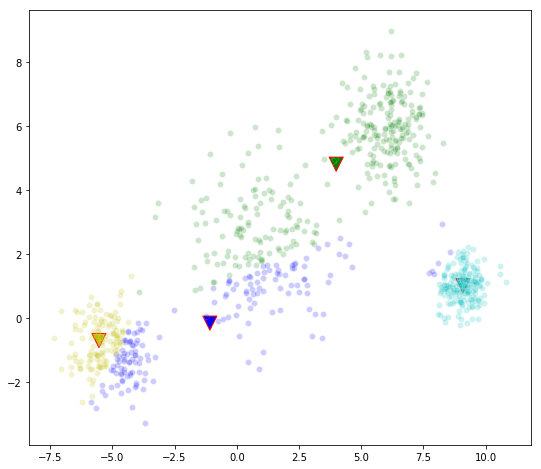

In [11]:
k_means() #perform the algorith to re-calculate the cluster and map the point according to new clusters
plot() # plot hte new clusters and points

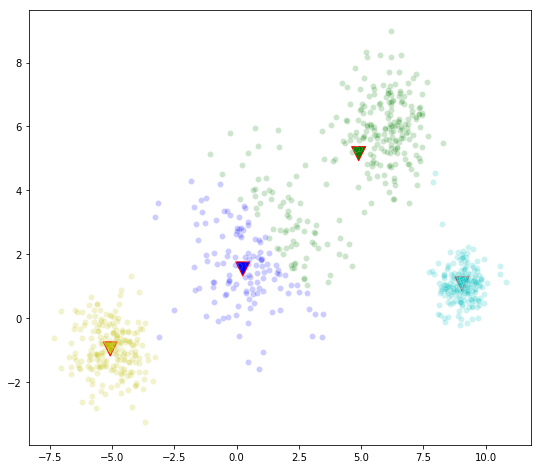

In [12]:
k_means()
plot()

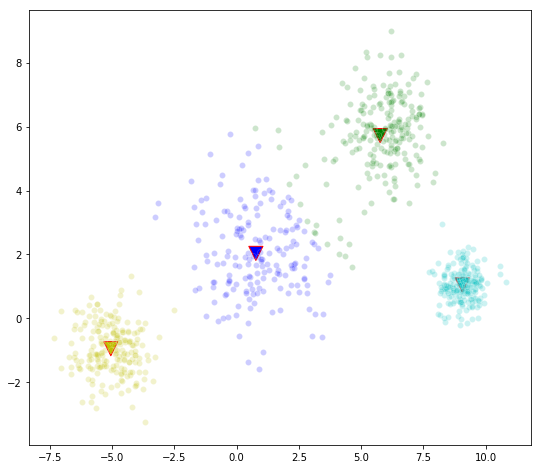

In [13]:
k_means()
plot()

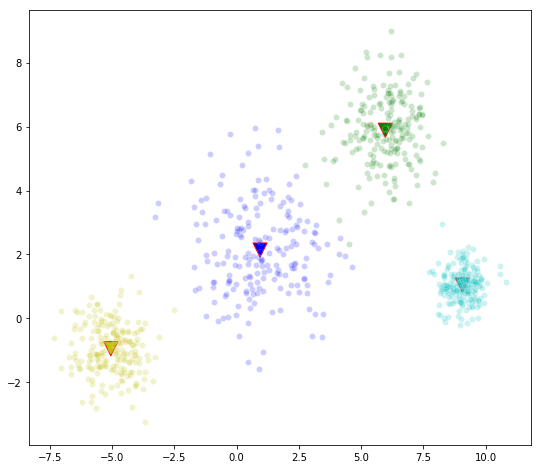

In [14]:
k_means()
plot()

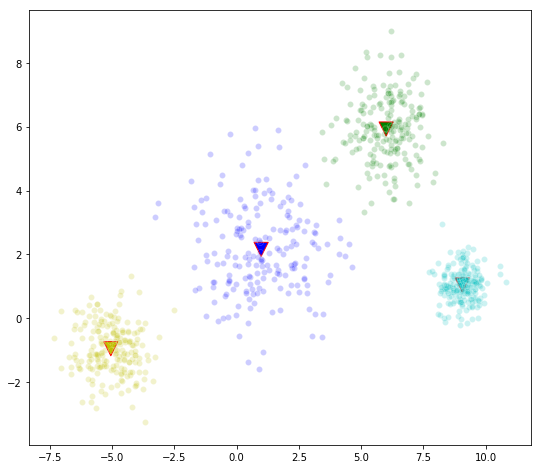

In [15]:
k_means()
plot()